# State Estimation

Prognostics involves two key steps: 1) state estimation and 2) prediction. [State estimation](https://nasa.github.io/progpy/prog_algs_guide.html#prog-algs-guide:~:text=to%20toe%20prediction.-,State%20Estimation,-%23) is the process of estimating the current state of the system using sensor data and a prognostics model. The result is an estimate of the current state of the system with uncertainty. This estimate can then used by the predictor to perform prediction of future states and events. In this section, we describe state estimation and the tools within ProgPy to implement it. 

State estimation is the process of estimating the internal model state (`x`) using the inputs, outputs, and parameters of the system. This is necessary for cases where the model state isn't directly measurable (i.e. *hidden states*), or where there is sensor noise in state measurements. 

The foundation of state estimators is the estimate method. The estimate method is called with a time, inputs, and outputs. Each time estimate is called, the internal state estimate is updated. For example: `state_estimator.estimate(time, inputs, outputs)`, then the resulting state can be accessed using the property x (i.e., `state_estimator.estimate .x`).

ProgPy includes a number of [state estimators](https://nasa.github.io/progpy/api_ref/prog_algs/StateEstimator.html). The most common techniques include Kalman Filters and Particle Filters. Users can also define their own custom state estimators. Examples of each of these are presented below. 

## Kalman Filter

One method for state estimation in ProgPy is using a [Kalman Filter (KF)](https://nasa.github.io/progpy/api_ref/prog_algs/StateEstimator.html#:~:text=Unscented%20Kalman%20Filter-,Kalman,-Filter). Kalman Filters are a simple, efficient state estimator for linear systems where state is represented by a mean and covariance matrix. The resulting state is represented by a [progpy.uncertain_data.MultivariateNormalDist](https://nasa.github.io/progpy/api_ref/progpy/UncertainData.html#progpy.uncertain_data.MultivariateNormalDist). Only works with Prognostic Models inheriting from [progpy.LinearModel](https://nasa.github.io/progpy/api_ref/progpy/LinearModel.html#progpy.LinearModel). 

To illustrate how to use a Kalman Filter for state estimation, we'll use a linear version of the ThrownObject model, and use the KF State estimator with fake data to estimate state.

First, the necessary imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from progpy.models.thrown_object import LinearThrownObject
from progpy.state_estimators import KalmanFilter

Let's instantiate the model.

In [2]:
m = LinearThrownObject()

To instantiate the Kalman filter, we need an initial (i.e. starting) state. We'll define this as slightly off of the actual state, so first we'll print the acutal state in the model for our information. 

In [3]:
print('Initial thrower height:', m['thrower_height'])
print('Initial speed:', m['throwing_speed'])

Initial thrower height: 1.83
Initial speed: 40


Given this, let's define our starting state for estimation. 

In [4]:
x_guess = m.StateContainer({'x': 1.75, 'v': 35}) # Slightly off of true x0

Now we can instantiate our Kalman filter. The Kalman filter requires two arguments, the prognostics model to be used in state estimation and an initial starting state. See [Kalman Filter Docs](https://nasa.github.io/progpy/api_ref/progpy/StateEstimator.html#progpy.state_estimators.KalmanFilter) for a full description of supported arguments.

In [5]:
kf = KalmanFilter(m, x_guess)

/Users/kjgriff2/Desktop/Python Code/progpy/src/progpy/state_estimators/kalman_filter.py:83: UserWarning: Warning: Use UncertainData type if estimating filtering with uncertain data.
  warn("Warning: Use UncertainData type if estimating filtering with uncertain data.")


With this, we're ready to run the Kalman Filter state estimation. In the following, we'll use simulated data from the ThrownObject model. In a real application, we would be using sensor data from the system. 

First, define the time step and pick a print frequency. 

In [6]:
dt = 0.01 # time step (s)
print_freq = 50 # print every 50th iteration

Next, initialize the state and input. Note that there is no input for this model, and thus it is defined as an empty InputContainer.

In [7]:
x = m.initialize() # Initial state
u = m.InputContainer({}) # Initial input

Now let's run the Kalman filter. For each iteration, we'll first get the simulated output. (Note: In a real application, this would be a measured value.) Then we'll esimate the new state by calling the `estimate` method of the Kalman filter class, which takes input of the current timestamp, current input, and current output. The estimated state can then be accessed, and we print a comparison. Finally, we'll update the state, `x`. 

To visualize, we'll plot the error (i.e. the absolute value of the difference between the estimated state and the true state) throughout time. Notice that the error decreases as we progress through time. 

{}
{}
{}
{}
{}


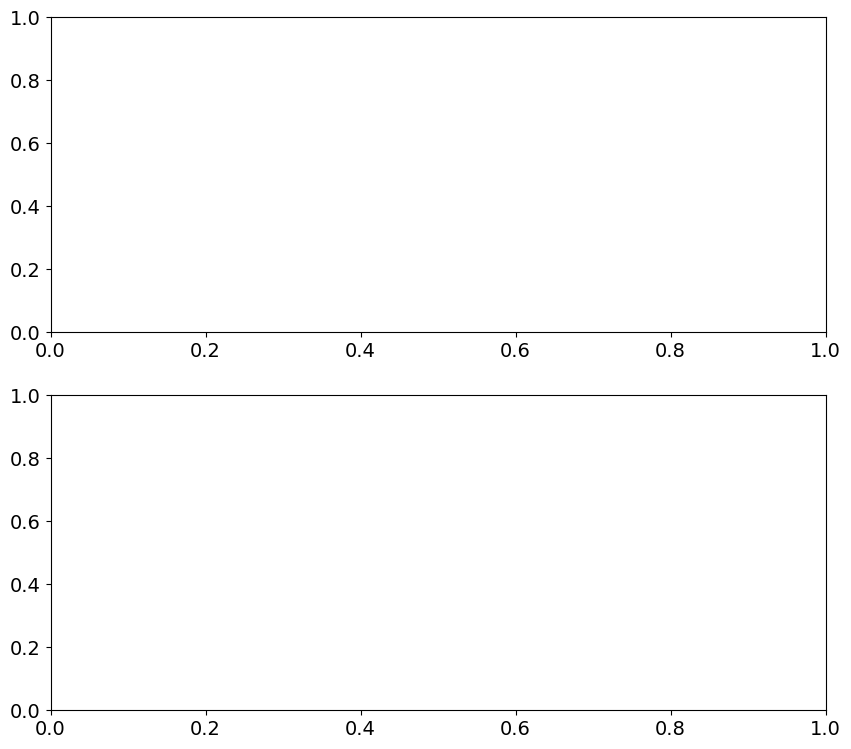

In [9]:
fig, (ax1, ax2) = plt.subplots(2) # Initialize figure

for i in range(5):

    # Get simulated output (would be measured values in a real application)
    z = m.output(x)

    # Estimate new state
    print(u)
    # kf.estimate(i*dt, u, z)
    # x_est = kf.x.mean

    # Print results 
    # if i%print_freq == 0:  # Print every print_freq'th iteration
    #     print(f"t: {i*dt:.2f}\n\tEstimate: {x_est}\n\tTruth: {x}")
    #     diff = {key: abs(x_est[key] - x[key]) for key in x.keys()}
   #      print(f"\t Diff: {diff}")
        
    #     ax1.plot(i*dt, diff['x'], '-ob')
    #     ax2.plot(i*dt, diff['v'], '-*r')
    #     ax1.set(xlabel='Time', ylabel='Error in x')
    #     ax2.set(xlabel='Time', ylabel='Error in y')

    # Update real state for next step
    # x = m.next_state(x, u, dt)

plt.show()

With this, we have illustrated how to use a built-in Kalman filter to perform state estimation. Next, we'll show how to create a new, custom state estimator. 

## Unscented Kalman Filter
**A version of this section will be added in release v1.8**

## Particle Filter
**A version of this section will be added in release v1.8**

## Extending
**A version of this section will be added in release v1.8**